# Lasso Notebook

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings('ignore')


housing = pd.read_csv('/Users/Eugene/OneDrive/ML/ML_Project/Group/housing.csv', index_col=0)
housing.shape

(2578, 167)

In [70]:
housetarg = pd.Series(housing.SalePrice_Log, name='target')
housefeature = housing.drop('SalePrice_Log',axis=1)

In [71]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(housefeature, housetarg, random_state=8)
Xtrain.shape, Xtest.shape

((1933, 166), (645, 166))

In [103]:
import numpy as np
alphas = np.linspace(0.000001,.0001,200)
#.0001-.001, 

### Lasso Gridsearch CV

In [94]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#randomized is faster
from sklearn.linear_model import Lasso

In [95]:
lasso = Lasso(normalize=True)

In [105]:
grid = GridSearchCV(estimator=lasso, param_grid={'alpha':alphas}, cv=10, return_train_score=True)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([1.00000000e-06, 1.49748744e-06, 1.99497487e-06, 2.49246231e-06,
       2.98994975e-06, 3.48743719e-06, 3.98492462e-06, 4.48241206e-06,
       4.97989950e-06, 5.47738693e-06, 5.97487437e-06, 6.47236181e-06,
       6.96984925e-06, 7.46733668e-06, 7.96482412e-06, 8.46231156e-06,
       8.95979899e-06, 9.45728643e-06, 9....
       8.85577889e-05, 8.90552764e-05, 8.95527638e-05, 9.00502513e-05,
       9.05477387e-05, 9.10452261e-05, 9.15427136e-05, 9.20402010e-05,
       9.25376884e-05, 9.30351759e-05, 9.35326633e-05, 9.40301508e-05,
       9.45276382e-05, 9.50251256e-05, 9.55226131e-05, 9.60201005e-05,
       9.65175879e-05, 9.70150754e-05, 9.75125628e-05, 9.80100503e-05,
       9.85075377e-05, 9.90050251e-05, 9.95025126e-05, 1.00000000e-04])},
             return_train_score=True)

In [108]:
grid.score(Xtest,ytest)

0.9400547063399385

In [109]:
best_model = grid.best_estimator_
best_model.score(Xtest, ytest)

0.9400547063399385

In [110]:
best_model.coef_

array([ 8.23019716e-02, -0.00000000e+00,  0.00000000e+00, -4.81541885e-03,
        0.00000000e+00, -1.03713856e-03,  5.50723275e-02,  3.99655831e-02,
        2.12404107e-03,  5.74886964e-04, -0.00000000e+00, -0.00000000e+00,
        4.08582323e-01,  3.70186913e-05,  6.38260436e-03,  6.51068817e-03,
        4.02015522e-03, -0.00000000e+00,  1.26520074e-02,  3.16564775e-03,
        7.88846956e-05, -0.00000000e+00,  4.45391836e-05, -0.00000000e+00,
        7.26439512e-05,  9.70960420e-03,  5.91050889e-02, -2.79157163e-05,
       -1.34496612e-03,  2.79171603e-03, -9.46063369e-03, -5.01042280e-02,
        2.39269148e-02,  3.49724172e-03,  1.88759778e-02,  3.66773814e-02,
        0.00000000e+00,  1.30091171e-02,  2.93990098e-05,  9.06715484e-05,
        8.17101611e-05,  8.90866937e-05,  2.03474755e-04,  2.14979364e-05,
        0.00000000e+00,  1.27576008e-03, -7.34822128e-02,  0.00000000e+00,
        1.01731677e-01,  4.09587410e-02, -2.09317437e-02,  1.02317703e-02,
       -1.35067038e-02, -

In [111]:
print(grid.best_score_)
print(grid.best_params_)

0.9263562793852405
{'alpha': 2.2889447236180907e-05}


In [112]:
# print(grid.cv_results_.keys())
# print(grid.cv_results_)

In [113]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.075364,0.019247,0.002569,0.004069,1e-06,{'alpha': 1e-06},0.949986,0.935020,0.911518,0.948219,0.936967,0.929126,0.923260,0.935798,0.925148,0.850974,0.924602,0.026840,126,0.939884,0.941475,0.943607,0.940220,0.941325,0.941964,0.942117,0.941503,0.942459,0.949134,0.942369,0.002469
1,0.059004,0.022372,0.003851,0.003432,1.49749e-06,{'alpha': 1.4974874371859298e-06},0.950045,0.935133,0.911556,0.948402,0.937108,0.929247,0.923241,0.936556,0.925296,0.851099,0.924768,0.026871,119,0.939875,0.941463,0.943598,0.940204,0.941307,0.941951,0.942104,0.941481,0.942445,0.949120,0.942355,0.002470
2,0.047476,0.017706,0.004084,0.004051,1.99497e-06,{'alpha': 1.9949748743718594e-06},0.950101,0.935266,0.911586,0.948572,0.937221,0.929362,0.923224,0.937161,0.925453,0.851220,0.924917,0.026896,113,0.939861,0.941450,0.943586,0.940184,0.941292,0.941933,0.942087,0.941452,0.942430,0.949101,0.942338,0.002469
3,0.035025,0.008617,0.001005,0.002106,2.49246e-06,{'alpha': 2.4924623115577894e-06},0.950160,0.935382,0.911630,0.948729,0.937313,0.929477,0.923209,0.937625,0.925614,0.851344,0.925048,0.026912,107,0.939846,0.941434,0.943574,0.940160,0.941278,0.941911,0.942068,0.941412,0.942414,0.949082,0.942318,0.002470
4,0.034179,0.003106,0.001353,0.001185,2.98995e-06,{'alpha': 2.989949748743719e-06},0.950232,0.935485,0.911682,0.948853,0.937399,0.929595,0.923201,0.937857,0.925766,0.851440,0.925151,0.026922,102,0.939830,0.941414,0.943560,0.940135,0.941263,0.941886,0.942053,0.941380,0.942395,0.949061,0.942297,0.002470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.018298,0.000784,0.002966,0.000382,9.80101e-05,{'alpha': 9.80100502512563e-05},0.949636,0.932867,0.908093,0.944501,0.935220,0.925875,0.915751,0.935486,0.929709,0.847584,0.922472,0.027545,196,0.929854,0.931965,0.933932,0.930765,0.931736,0.932770,0.932766,0.931690,0.932949,0.939940,0.932837,0.002611
196,0.018687,0.001179,0.003254,0.000441,9.85075e-05,{'alpha': 9.850753768844223e-05},0.949606,0.932836,0.908043,0.944471,0.935196,0.925843,0.915701,0.935440,0.929702,0.847560,0.922440,0.027545,197,0.929796,0.931916,0.933876,0.930715,0.931686,0.932715,0.932713,0.931637,0.932897,0.939891,0.932784,0.002612
197,0.019953,0.002007,0.003223,0.000663,9.9005e-05,{'alpha': 9.900502512562816e-05},0.949576,0.932805,0.907993,0.944441,0.935171,0.925811,0.915650,0.935393,0.929694,0.847537,0.922407,0.027544,198,0.929739,0.931867,0.933819,0.930665,0.931635,0.932662,0.932660,0.931584,0.932844,0.939841,0.932732,0.002612
198,0.020336,0.001598,0.003396,0.000394,9.95025e-05,{'alpha': 9.950251256281409e-05},0.949546,0.932774,0.907942,0.944410,0.935146,0.925780,0.915603,0.935347,0.929686,0.847513,0.922375,0.027544,199,0.929681,0.931818,0.933763,0.930614,0.931584,0.932610,0.932609,0.931532,0.932791,0.939791,0.932679,0.002613


In [114]:
cv_results.sort_values('mean_test_score', ascending=False).head(5)
# look for the best test set performance

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
44,0.023269,0.001388,0.003166,0.000440,2.28894e-05,{'alpha': 2.2889447236180907e-05},0.951568,0.937074,0.911862,0.949231,0.938446,0.930545,0.923457,0.938875,0.929553,0.852951,0.926356,0.026854,1,0.938323,0.939959,0.942111,0.938557,0.939669,0.940437,0.940640,0.939869,0.940812,0.947580,0.940796,0.002487
45,0.022617,0.001062,0.003309,0.000327,2.33869e-05,{'alpha': 2.3386934673366837e-05},0.951584,0.937084,0.911853,0.949207,0.938427,0.930536,0.923442,0.938887,0.929593,0.852951,0.926356,0.026854,2,0.938274,0.939918,0.942070,0.938512,0.939619,0.940400,0.940587,0.939830,0.940758,0.947537,0.940750,0.002488
46,0.022691,0.000879,0.003470,0.000432,2.38844e-05,{'alpha': 2.3884422110552766e-05},0.951597,0.937092,0.911839,0.949182,0.938406,0.930526,0.923425,0.938899,0.929633,0.852951,0.926355,0.026854,3,0.938226,0.939877,0.942029,0.938465,0.939568,0.940362,0.940533,0.939790,0.940709,0.947493,0.940705,0.002489
43,0.022762,0.000880,0.003375,0.000323,2.2392e-05,{'alpha': 2.2391959798994978e-05},0.951547,0.937064,0.911869,0.949255,0.938463,0.930552,0.923471,0.938865,0.929512,0.852940,0.926354,0.026856,4,0.938372,0.939998,0.942150,0.938602,0.939718,0.940476,0.940692,0.939908,0.940865,0.947632,0.940841,0.002489
47,0.023329,0.001738,0.003489,0.000411,2.43819e-05,{'alpha': 2.4381909547738696e-05},0.951611,0.937099,0.911823,0.949155,0.938389,0.930515,0.923408,0.938910,0.929675,0.852951,0.926354,0.026855,5,0.938182,0.939834,0.941987,0.938418,0.939523,0.940323,0.940478,0.939750,0.940661,0.947449,0.940661,0.002489


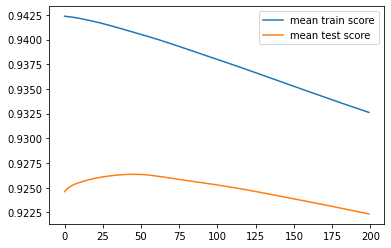

In [115]:
cv_results['mean_train_score'].plot(label='mean train score')
cv_results['mean_test_score'].plot(label='mean test score')
plt.legend(loc=1)

### Lasso model (user provides alpha)

In [117]:
lasso2 = Lasso(alpha=2.2889447236180907e-05, normalize=True)
lasso2.get_params()

{'alpha': 2.2889447236180907e-05,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [118]:
lasso2.fit(Xtrain,ytrain)

Lasso(alpha=2.2889447236180907e-05, normalize=True)

In [119]:
print('Train score: ', lasso2.score(Xtrain,ytrain))
print('Test score: ', lasso2.score(Xtest,ytest))

Train score:  0.9400327472046399
Test score:  0.9400547063399385


In [120]:
lasso2.score(Xtest,ytest)

0.9400547063399385

In [121]:
print('the intercept is: %.2f' %(lasso2.intercept_))
coefs = pd.Series(lasso2.coef_, index=housefeature.columns)

the intercept is: 4.70


In [122]:
coefs.sort_values(ascending=False).head(30)

Neighborhood__GrnHill     0.449562
GrLivArea_Log             0.408582
Exterior1st__PreCast      0.344966
Neighborhood__StoneBr     0.113123
Neighborhood__Crawfor     0.110705
SaleCondition__Alloca     0.102614
Exterior1st__BrkComm      0.101732
Heating__Wall             0.093383
LotArea_Log               0.082302
Neighborhood__NridgHt     0.080030
Neighborhood__NoRidge     0.079645
Foundation__Stone         0.079161
Neighborhood__Blueste     0.075196
Neighborhood__Somerst     0.073915
Neighborhood__NPkVill     0.067675
Neighborhood__Greens      0.063157
CentralAir                0.059105
OverallQual               0.055072
Neighborhood__BrkSide     0.054743
MSSubClass__75            0.053276
SaleCondition__Partial    0.050376
Neighborhood__ClearCr     0.042442
Exterior1st__BrkFace      0.040959
OverallCond               0.039966
Neighborhood__BrDale      0.039155
GarageCars                0.036677
Heating__GasW             0.030538
KitchenQual               0.023927
HouseStyle__SFoyer  

### Calculate RMSE

In [123]:
mse = np.mean((lasso2.predict(Xtest)-ytest)**2)
mse

0.008638345977021868

In [124]:
RMSE = np.sqrt(mse)
RMSE

0.09294270265610888

### Using `cross_val_score`

In [66]:
import sklearn.model_selection as ms
scores = ms.cross_val_score(estimator=lasso2, X=Xtrain, y=ytrain, cv=5)
scores = pd.Series(scores)

In [67]:
print(scores.round(3))
print('-'*40)
print('Score Mean %.3f' %(scores.mean()))
print('Score std deviation: %.3f' %(scores.std()))

0    0.865
1    0.879
2    0.869
3    0.882
4    0.846
dtype: float64
----------------------------------------
Score Mean 0.868
Score std deviation: 0.014
